##### LAB 5

In [20]:
#QUESTION A1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [22]:
feature = 'absolute_magnitude' 
target = 'is_hazardous'

file_path = 'D:\\BHAVIKA\\sem 5\\FDS\\dataset\\nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(file_path)

X = data[[feature]].values
y = data[target].values

imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

In [24]:
#QUESTION A2

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def calculate_mape(y_true, y_pred):
    nonzero_indices = y_true != 0
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
    
y_train_pred = reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = calculate_mape(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = calculate_mape(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Training MAPE: {mape_train:.2f}%")
print(f"Training R²: {r2_train:.4f}")

print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test MAPE: {mape_test:.2f}%")
print(f"Test R²: {r2_test:.4f}")

Training MSE: 0.0981
Training RMSE: 0.3132
Training MAPE: 76.95%
Training R²: 0.1181
Test MSE: 0.0984
Test RMSE: 0.3137
Test MAPE: 76.94%
Test R²: 0.1189


In [26]:
#QUESTION A3

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [28]:
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R²: {r2_train}")

print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R²: {r2_test}")

Training MSE: 0.09806726752247899
Training RMSE: 0.3131569375288994
Training R²: 0.11809209606654747
Test MSE: 0.09837966588555501
Test RMSE: 0.3136553297579287
Test R²: 0.11888450618042534


In [30]:
print(data.head)

<bound method NDFrame.head of           neo_id                name  absolute_magnitude  \
0        2162117  162117 (1998 SD15)              19.140   
1        2349507    349507 (2008 QY)              18.500   
2        2455415    455415 (2003 GA)              21.450   
3        3132126           (2002 PB)              20.630   
4        3557844           (2011 DW)              22.700   
...          ...                 ...                 ...   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338197  54456245           (2024 NE)              23.887   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_diameter_max orbiting_body  \
0                     0.394962                0.883161         Earth   
1                     0.530341                1.185878         Earth   
2                     0.136319   

In [32]:
#QUESTION A4

import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

In [34]:
X = data.drop(columns=['neo_id', 'name', 'is_hazardous'])

numeric_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=[object]).columns

numeric_data = X[numeric_columns]
imputer_numeric = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer_numeric.fit_transform(numeric_data)

categorical_data = X[categorical_columns]
imputer_categorical = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = imputer_categorical.fit_transform(categorical_data)

#categorical to df
categorical_data_imputed_df = pd.DataFrame(categorical_data_imputed, columns=categorical_columns)
categorical_data_encoded = pd.get_dummies(categorical_data_imputed_df)

#numeric & categorical combine
X_combined = pd.concat([pd.DataFrame(numeric_data_imputed, columns=numeric_columns), categorical_data_encoded], axis=1)

X_train, X_test = train_test_split(X_combined, test_size=0.3, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X_train)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("Cluster labels:\n", cluster_labels)
print("\nCluster centers:\n", cluster_centers)

Cluster labels:
 [0 0 1 ... 0 0 1]

Cluster centers:
 [[2.34640025e+01 1.26466538e-01 2.82787776e-01 4.29057943e+04
  2.16348610e+07 1.00000000e+00]
 [2.25080402e+01 1.82810087e-01 4.08775781e-01 5.75522824e+04
  5.75150038e+07 1.00000000e+00]]


In [36]:
# QUESTION A5

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(X_train, kmeans.labels_)
calinski_harabasz_avg = calinski_harabasz_score(X_train, kmeans.labels_)
davies_bouldin_avg = davies_bouldin_score(X_train, kmeans.labels_)

print(f"silhouette score: {silhouette_avg:.4f}")
print(f"calinski-harabasz score: {calinski_harabasz_avg:.4f}")
print(f"davies-bouldin index: {davies_bouldin_avg:.4f}")

silhouette score: 0.6170
calinski-harabasz score: 658810.3924
davies-bouldin index: 0.5178


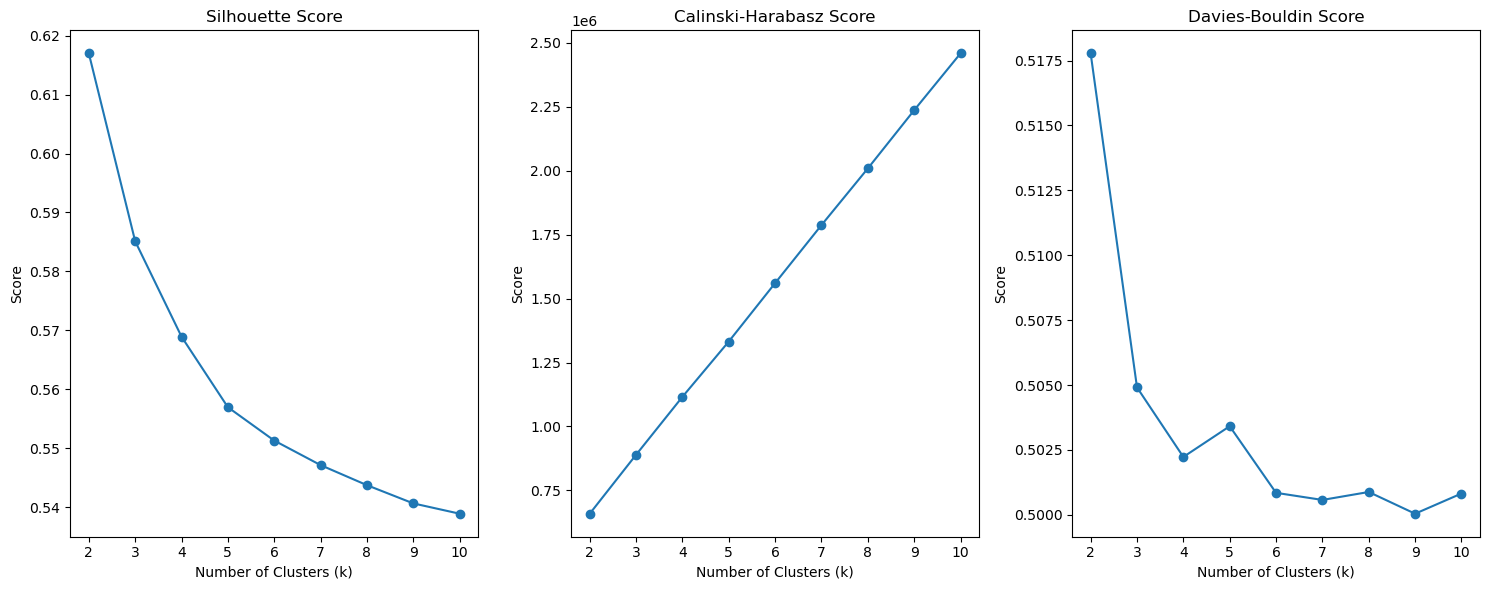

In [47]:
#QUESTION A6

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Assuming X_train is a NumPy array
k_values = range(2, 11)  # Cluster values from 2 to 10

# Lists to store the scores
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    clusters = kmeans.labels_
    
    # Calculate the scores
    silhouette_avg = silhouette_score(X_train, clusters)
    calinski_harabasz_avg = calinski_harabasz_score(X_train, clusters)
    davies_bouldin_avg = davies_bouldin_score(X_train, clusters)
    
    # Append the scores to the lists
    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plotting the scores
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


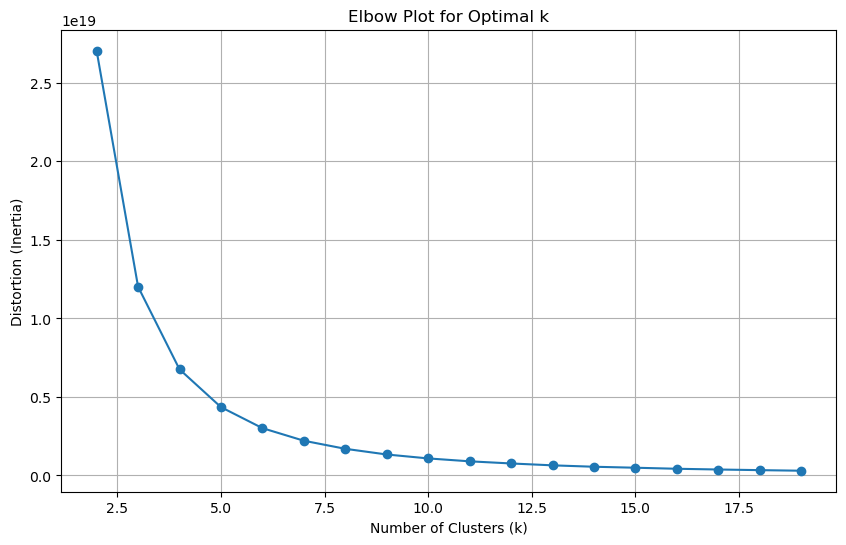

In [40]:
#QUESTION A7

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize an empty list to store the distortions
distortions = []

# Loop over different values of k to calculate the distortions (inertia)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()
